In [339]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [340]:
#Test dataset
df = DataFrame()
#first or third year courses
df['year'] = ['F', 'T', 'F', 'T', 'F', 'T', 'F', 'T', 'F', 'T']
df['enrol'] = [200, 100, 210, 105, 220, 120, 230, 90, 223, 102]
df['gpa'] = [2.9, 3.2, 3.0, 3.19, 3.05, 3.3, 28, 3.5, 3.1, 3.03]
df;

In [341]:
dfx = df.drop (columns =['year'])
sy = df.year
dfx, sy

(   enrol    gpa
 0    200   2.90
 1    100   3.20
 2    210   3.00
 3    105   3.19
 4    220   3.05
 5    120   3.30
 6    230  28.00
 7     90   3.50
 8    223   3.10
 9    102   3.03,
 0    F
 1    T
 2    F
 3    T
 4    F
 5    T
 6    F
 7    T
 8    F
 9    T
 Name: year, dtype: object)

In [342]:
from sklearn.model_selection import train_test_split
dfx_train, dfx_test, sy_train, sy_test = train_test_split(dfx,sy)
dfx_train, dfx_test, sy_train, sy_test;

In [343]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le

LabelEncoder()

In [344]:
le = le.fit(sy_train)
le.classes_

array(['F', 'T'], dtype=object)

In [345]:
y_train = le.transform(sy_train)
sy_train, y_train

(7    T
 6    F
 1    T
 0    F
 4    F
 2    F
 3    T
 Name: year, dtype: object,
 array([1, 0, 1, 0, 0, 0, 1]))

In [346]:
dfx_train.to_numpy()

array([[ 90.  ,   3.5 ],
       [230.  ,  28.  ],
       [100.  ,   3.2 ],
       [200.  ,   2.9 ],
       [220.  ,   3.05],
       [210.  ,   3.  ],
       [105.  ,   3.19]])

In [347]:
nl = preprocessing.MinMaxScaler()
nl = nl.fit(dfx_train.to_numpy())
x_train = nl.transform (dfx_train.to_numpy())
x_train

array([[0.        , 0.02390438],
       [1.        , 1.        ],
       [0.07142857, 0.01195219],
       [0.78571429, 0.        ],
       [0.92857143, 0.0059761 ],
       [0.85714286, 0.00398406],
       [0.10714286, 0.01155378]])

In [348]:
x_train.shape

(7, 2)

In [349]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
#since my test dataset is small i only used 1 neighbour
#however, for a larger dataset, more neighbors would be better for higher precision, maybe like 10 or so
knn = knn.fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=1)

In [350]:
y_test = le.transform(sy_test.to_numpy())
sy_test, y_test

(8    F
 5    T
 9    T
 Name: year, dtype: object,
 array([0, 1, 1]))

In [351]:
x_test = nl.transform(dfx_test.to_numpy())
dfx_test, x_test

(   enrol   gpa
 8    223  3.10
 5    120  3.30
 9    102  3.03,
 array([[0.95      , 0.00796813],
        [0.21428571, 0.01593625],
        [0.08571429, 0.00517928]]))

In [352]:
knn.predict(x_test)

array([0, 1, 1])

In [353]:
y_test

array([0, 1, 1])

In [354]:
knn.score(x_test, y_test)

1.0

In [355]:
knn.score(x_train, y_train)

1.0

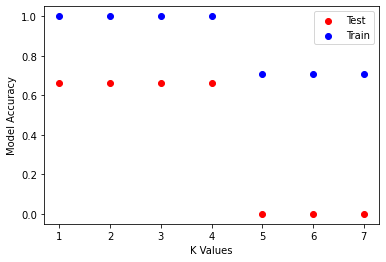

In [356]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

import numpy as np

k_values = np.array([1, 2, 3, 4, 5, 6, 7])
test_acc = np.array([0.66, 0.66, 0.66, 0.66, 0.0, 0.0, 0.0])
train_acc = np.array([1.0, 1.0, 1.0, 1.0, 0.71, 0.71, 0.71])

#these above values were found by:
#1) run program at n_neighbor = 1
#2) record knn score (model accuracy) for test and train sets
#3) edit / increment n_neighbor value by 1 until like 10 or so
#4) repeat steps 1-3

ax.scatter(k_values, test_acc, c = 'r', label = 'Test')
ax.scatter(k_values, train_acc, c = 'b', label = 'Train')

plt.xlabel('K Values')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

In [357]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le = le.fit(sy_train)
y_train = le.transform(sy_train)
stand = preprocessing.StandardScaler()
standfitted = stand.fit(dfx_train.to_numpy())
x_train = standfitted.transform(dfx_train.to_numpy())
dfx_train, x_train

(   enrol    gpa
 7     90   3.50
 6    230  28.00
 1    100   3.20
 0    200   2.90
 4    220   3.05
 2    210   3.00
 3    105   3.19,
 array([[-1.28220517, -0.36678861],
        [ 1.11124448,  2.44897895],
        [-1.11124448, -0.4012674 ],
        [ 0.59836241, -0.43574619],
        [ 0.94028379, -0.41850679],
        [ 0.7693231 , -0.42425326],
        [-1.02576414, -0.40241669]]))

In [358]:
x_train.shape

(7, 2)

In [359]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn = knn.fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=7)

In [360]:
y_test = le.transform(sy_test.to_numpy())
sy_test, y_test

(8    F
 5    T
 9    T
 Name: year, dtype: object,
 array([0, 1, 1]))

In [361]:
x_test = standfitted.transform(dfx_test.to_numpy())
dfx_test, x_test

(   enrol   gpa
 8    223  3.10
 5    120  3.30
 9    102  3.03,
 array([[ 0.991572  , -0.41276033],
        [-0.7693231 , -0.38977447],
        [-1.07705234, -0.42080538]]))

In [362]:
knn.predict(x_test)

array([0, 0, 0])

In [363]:
y_test

array([0, 1, 1])

In [364]:
knn.score(x_test, y_test)

0.3333333333333333

In [365]:
knn.score(x_train, y_train)

0.5714285714285714

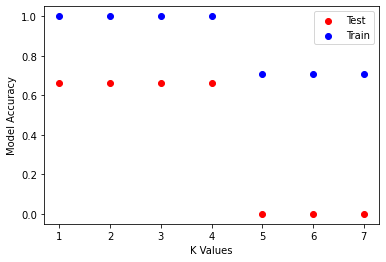

In [366]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

import numpy as np

k_values = np.array([1, 2, 3, 4, 5, 6, 7])
test_acc = np.array([0.66, 0.66, 0.66, 0.66, 0.0, 0.0, 0.0])
train_acc = np.array([1.0, 1.0, 1.0, 1.0, 0.71, 0.71, 0.71])

ax.scatter(k_values, test_acc, c = 'r', label = 'Test')
ax.scatter(k_values, train_acc, c = 'b', label = 'Train')

plt.xlabel('K Values')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

#The difference between this plot and the last one is that here, "x" is preprocessed with standard scaler
#instead of min max scaler

In [367]:
#Here chosen K = 1 and chosen scaler = MinMax, USE CHOSEN VALUES FROM 3a

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1) #k = 1
knn = knn.fit(x_train,y_train)
knn

x_test = nl.transform(dfx_test.to_numpy()) #scaler.transform = MinMax scaler (nl)


from sklearn.metrics import confusion_matrix

y_pred = knn.predict(x_test)

y_pred, y_test

(array([0, 0, 0]), array([0, 1, 1]))

In [368]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[1, 2],
       [0, 0]])

In [369]:
new_example_rawdata = np.array([[140, 3.6]])

#[enrol, gpa] which corresponds to [130, 3.5] above

x_new = nl.transform(new_example_rawdata)
x_new

array([[0.35714286, 0.02788845]])

In [370]:
knn.predict(x_new)

array([0])

In [371]:
le.inverse_transform(knn.predict(x_new))

array(['F'], dtype=object)